In [332]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline 

In [333]:
dataframe = pd.ExcelFile("testetcc.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [334]:
dataFrame

,Data,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2003-01-01,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,120511.0
1,2003-02-01,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,131846.0
2,2003-03-01,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,125162.0
3,2003-04-01,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,130799.0
4,2003-05-01,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...,...,...
218,2021-03-01,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,208801.0
219,2021-04-01,1.51,0.38,0.31,1100.0,2.55,9.867923e+09,682431.7,34.66,1910264,191853.0
220,2021-05-01,4.10,0.96,0.83,1100.0,3.29,8.583950e+09,698842.4,24.05,1886543,206221.0
221,2021-06-01,0.60,0.60,0.53,1100.0,3.78,1.025090e+10,NaN,NaN,2011587,191571.0


In [335]:
df = dataFrame.drop(['Data'], 1, inplace = False)

In [336]:
df

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,120511.0
1,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,131846.0
2,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,125162.0
3,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,130799.0
4,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...,...
218,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,208801.0
219,1.51,0.38,0.31,1100.0,2.55,9.867923e+09,682431.7,34.66,1910264,191853.0
220,4.10,0.96,0.83,1100.0,3.29,8.583950e+09,698842.4,24.05,1886543,206221.0
221,0.60,0.60,0.53,1100.0,3.78,1.025090e+10,NaN,NaN,2011587,191571.0


In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   IGPM  Δ%                    222 non-null    float64
 1   INPC Δ%                     222 non-null    float64
 2   IPCA  Δ%                    222 non-null    float64
 3   Salário minimo R$           222 non-null    float64
 4   Taxa Celic Over % a.a       222 non-null    float64
 5   Balança comercial US$       222 non-null    float64
 6   PIB R$ milhões              221 non-null    float64
 7   Produção industrial Δ% a.a  221 non-null    float64
 8   Casos covid                 223 non-null    int64  
 9   Unidades Vendidas           222 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 17.5 KB


In [338]:
df.isnull().sum()

IGPM  Δ%                      1
INPC Δ%                       1
IPCA  Δ%                      1
Salário minimo R$             1
Taxa Celic Over % a.a         1
Balança comercial US$         1
PIB R$ milhões                2
Produção industrial Δ% a.a    2
Casos covid                   0
Unidades Vendidas             1
dtype: int64

In [339]:
## valores faltantes são poucos

In [340]:
dataset = df.dropna()

In [341]:
dataset

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,120511.0
1,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,131846.0
2,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,125162.0
3,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,130799.0
4,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...,...
216,2.58,0.27,0.25,1100.0,1.81,-2.046388e+08,650694.2,2.38,1528758,180904.0
217,2.53,0.82,0.86,1100.0,1.57,1.822781e+09,673362.3,0.25,1346528,186718.0
218,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,208801.0
219,1.51,0.38,0.31,1100.0,2.55,9.867923e+09,682431.7,34.66,1910264,191853.0


## Análise significancia

In [342]:
##SEPARANDO AS VARIAVEIS X e Y
X = dataset.iloc[:,:-1]
y = dataset['Unidades Vendidas'].values

In [343]:
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [344]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     55.16
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.21e-50
Time:                        17:19:00   Log-Likelihood:                -2581.1
No. Observations:                 221   AIC:                             5182.
Df Residuals:                     211   BIC:                             5216.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.065e+05   1.36e+04     22.614      0.000     2.8e+05    3.33e+05
IGPM  Δ%                    -1.04e+04   3467.014     -3.000      0.003   -1.72e+04   -3567.923
INPC Δ%                     4.056e+04   1.75e+04      2.319      0.021    6087.571     7.5e+04
IPCA  Δ%                    -4.56e+04   1.98e+04     -2.302      0.022   -8.47e+04   -6548.997
Salário minimo R$           -802.2691     53.137    -15.098      0.000    -907.017    -697.521
Taxa Celic Over % a.a      -6203.6100    644.076     -9.632      0.000   -7473.257   -4933.963
Balança comercial US$       2.045e-07   1.07e-06      0.191      0.849   -1.91e-06    2.32e-06
PIB R$ milhões                 1.3152      0.087     15.072      0.000       1.143       1.487
Produção industrial Δ% a.a  1325.4733    309.754      4.279      0.000     714.864    1936.082
Casos covid                   -0.0623      0.008     -7.479      0.000      -0.079      -0.046
==============================================================================
Omnibus:                        2.290   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.953
Skew:                          -0.156   Prob(JB):                        0.377
Kurtosis:                       3.339   Cond. No.                     4.29e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.29e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Retirando balança comercial, p > 0,05

In [345]:
datasetclean = dataset.drop(['Balança comercial US$'], 1, inplace = False)

In [346]:
dataf = datasetclean

In [347]:
dataf

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,127177.5,2.21,0,120511.0
1,2.28,1.46,1.57,200.0,24.31,131373.6,3.01,0,131846.0
2,1.53,1.37,1.23,200.0,23.58,138690.5,0.00,0,125162.0
3,0.92,1.38,0.97,240.0,24.90,141388.1,-3.89,0,130799.0
4,-0.26,0.99,0.61,240.0,26.38,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...
216,2.58,0.27,0.25,1100.0,1.81,650694.2,2.38,1528758,180904.0
217,2.53,0.82,0.86,1100.0,1.57,673362.3,0.25,1346528,186718.0
218,2.94,0.86,0.93,1100.0,2.43,723966.1,10.53,2197488,208801.0
219,1.51,0.38,0.31,1100.0,2.55,682431.7,34.66,1910264,191853.0


In [348]:
##SEPARANDO AS VARIAVEIS X e Y 
X = dataf.iloc[:,:-1]
y = dataf['Unidades Vendidas'].values

## Modelo Regressão com STATS MODELS

In [349]:
## Foco em estatistica
Xc = sm.add_constant(X)
modelo_v1 = sm.OLS(y, Xc)
modelo_v2 = modelo_v1.fit()

In [350]:
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     62.34
Date:                Sat, 07 Aug 2021   Prob (F-statistic):           1.51e-51
Time:                        17:19:05   Log-Likelihood:                -2581.1
No. Observations:                 221   AIC:                             5180.
Df Residuals:                     212   BIC:                             5211.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       3.065e+05   1.35e+04     22.668      0.000     2.8e+05    3.33e+05
IGPM  Δ%                    -1.03e+04   3414.299     -3.016      0.003    -1.7e+04   -3566.026
INPC Δ%                      4.04e+04   1.74e+04      2.318      0.021    6045.778    7.48e+04
IPCA  Δ%                   -4.591e+04   1.97e+04     -2.331      0.021   -8.47e+04   -7081.914
Salário minimo R$           -799.3936     50.833    -15.726      0.000    -899.596    -699.191
Taxa Celic Over % a.a      -6170.8619    619.304     -9.964      0.000   -7391.644   -4950.080
PIB R$ milhões                 1.3111      0.084     15.537      0.000       1.145       1.477
Produção industrial Δ% a.a  1331.2836    307.548      4.329      0.000     725.040    1937.527
Casos covid                   -0.0618      0.008     -7.739      0.000      -0.078      -0.046
==============================================================================
Omnibus:                        2.219   Durbin-Watson:                   0.976
Prob(Omnibus):                  0.330   Jarque-Bera (JB):                1.881
Skew:                          -0.151   Prob(JB):                        0.390
Kurtosis:                       3.336   Cond. No.                     5.89e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regressão Stats Models

In [351]:
modelo_v2.params

const                         306483.087700
IGPM  Δ%                      -10296.351235
INPC Δ%                        40399.914674
IPCA  Δ%                      -45912.309196
Salário minimo R$               -799.393557
Taxa Celic Over % a.a          -6170.861925
PIB R$ milhões                     1.311143
Produção industrial Δ% a.a      1331.283628
Casos covid                       -0.061846
dtype: float64

In [352]:
previsao = modelo_v2.predict(Xc)

In [353]:
previsao

0      126001.608495
1      136273.279030
2      166060.800021
3      142919.738765
4      148392.649266
           ...      
216    150619.500348
217    184984.502789
218    201263.835540
219    219750.889283
220    196933.356747
Length: 221, dtype: float64

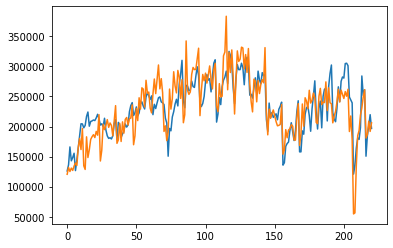

In [354]:
plt.plot(previsao)
plt.plot(y)

#### Prevendo o modelo com dados novos, teste

In [355]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.model_selection as ms

In [356]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 0)
Xc = sm.add_constant(X_train)
Xb = sm.add_constant(X_test)

modelo_v1 = sm.OLS(y_train, Xc)
modelo_v2 = modelo_v1.fit()


In [357]:
z = modelo_v2.predict(Xb)

In [358]:
rmse = sqrt(mean_squared_error(y_test,z))
print(int(rmse))

31804


## Regressao Machine Learning

In [359]:
from sklearn import linear_model

In [360]:
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [361]:
num_observ = len(dataf)
X = dataf.iloc[:,:-1].values
y = dataf['Unidades Vendidas'].values

In [362]:
from sklearn import model_selection as ms
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [363]:
modelo.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
print(modelo.coef_)

[-8.93156514e+03  3.74235801e+04 -4.69034048e+04 -8.25956758e+02
 -6.02508254e+03  1.36190949e+00  1.59522003e+03 -6.50594429e-02]


In [365]:
print(modelo.intercept_)

302287.11507821246


In [366]:
w = modelo.predict(X_test)

In [367]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test,w))

In [368]:
print(int(rmse))

31804


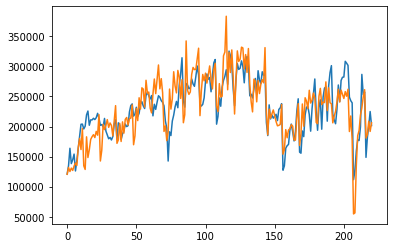

In [369]:
b = modelo.predict(X)
plt.plot(b)
plt.plot(y)

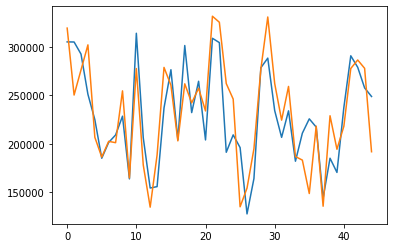

In [370]:
plt.plot(w)
plt.plot(y_test)

RMSE está no intervalo 0-infinito e retorna a magnitude dos erros e não sua direção
Quanto menor, melhor.

##  Random Forest Regressor

In [374]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# seprando X e Y
X = dataf.iloc[:,:-1]
y = dataf['Unidades Vendidas'].values

## seprando x e y em treino e teste
Xtr, Xval, ytr, yval = train_test_split(X, y, test_size=0.2, random_state=0)

#criando modelo regressor random forest
arveres = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1) 

##treinando com dados de treino
arveres.fit(Xtr, ytr)

# Prevendo com dados de teste
p = arveres.predict(Xval)

# analisando erro

rmse = sqrt(mean_squared_error(yval, p))
print(int((rmse)))

27956


## Importância dos indicadores 

In [375]:
## Select K best ja faz a normalização dos dados

from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression, f_classif
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

k=8
selector = SelectKBest(score_func=f_regression,k=8)
Xtrain2 = selector.fit_transform(Xtr,ytr)
Xval2 = selector.transform(Xval)

mdl = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)
mdl.fit(Xtrain2,ytr)

p = mdl.predict(Xval2)

score = sqrt(mean_squared_error(yval, p))

print("k = {} - RMSE = {}".format(k, score))

k = 8 - RMSE = 27956.5560609418


In [376]:
pd.Series(selector.scores_, index=Xtrain.columns)
# Quanto maior melhor

IGPM  Δ%                       1.556480
INPC Δ%                        0.385361
IPCA  Δ%                       0.473952
Salário minimo R$              2.242411
Taxa Celic Over % a.a         25.790344
PIB R$ milhões                 7.338456
Produção industrial Δ% a.a     5.223797
Casos covid                    4.128647
dtype: float64

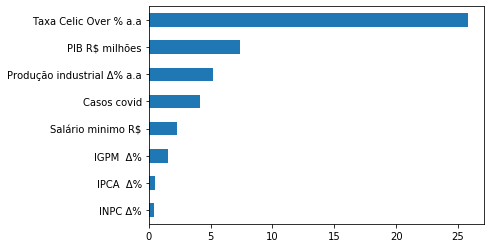

In [377]:
pd.Series(selector.scores_, index=Xtrain.columns).sort_values().plot.barh()

In [378]:
## as variaveis mais importante são a taxa celic, pib, variação produção industrial, casos covid....

Em proporções, quão importante cada feature é para o modelo de AM, onde quanto maior o valor, mais importante a feature é para o modelo

A Selic norteia todas as operações da economia brasileira que envolvem juros, como empréstimos, aplicações financeiras e financiamentos.

Em outras palavras, quando a taxa Selic sobe, os demais juros praticados no país também tendem a crescer.

O crescimento do PIB está relacionado com a ascensão da economia. Quanto maior o PIB, maior é a renda de um determinado lugar, portanto, por vezes, o PIB está relacionado com a qualidade de vida.

## Comparando previsao com dataset original

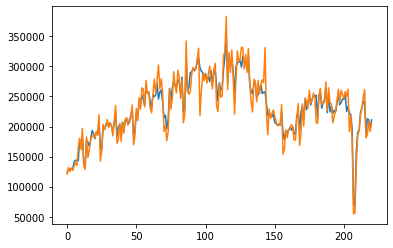

In [379]:
l = arveres.predict(X)
plt.plot(l)
plt.plot(y)

## Comparando previsao com dados novos

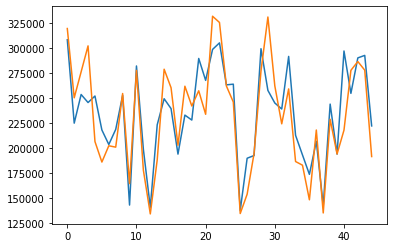

In [380]:
plt.plot(p)
plt.plot(yval)

In [381]:
dataf.head(-1)

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,127177.5,2.21,0,120511.0
1,2.28,1.46,1.57,200.0,24.31,131373.6,3.01,0,131846.0
2,1.53,1.37,1.23,200.0,23.58,138690.5,0.00,0,125162.0
3,0.92,1.38,0.97,240.0,24.90,141388.1,-3.89,0,130799.0
4,-0.26,0.99,0.61,240.0,26.38,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...
215,0.96,1.46,1.35,1045.0,1.94,676356.7,8.32,1340095,261321.0
216,2.58,0.27,0.25,1100.0,1.81,650694.2,2.38,1528758,180904.0
217,2.53,0.82,0.86,1100.0,1.57,673362.3,0.25,1346528,186718.0
218,2.94,0.86,0.93,1100.0,2.43,723966.1,10.53,2197488,208801.0


In [382]:
exemplo = np.array([2.1,0.85,0.83,1100,3.29,858355,30,1500000])
exemplo = exemplo.reshape(1,-1)
previsao = arveres.predict(exemplo)

In [383]:
print(int(previsao))

207587


# Classificadores

## Modelo K-Nearest Neighbors

In [385]:
# Bibliotecas para ler/manipular/ver nossos dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Biblioteca para criar nosso modelo de ML
from sklearn import preprocessing, model_selection, neighbors
from sklearn.preprocessing import StandardScaler

# Biblioteca para plotar nosso modelo
from mlxtend.plotting import plot_decision_regions

In [386]:
dataset

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,120511.0
1,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,131846.0
2,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,125162.0
3,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,130799.0
4,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,126942.0
...,...,...,...,...,...,...,...,...,...,...
216,2.58,0.27,0.25,1100.0,1.81,-2.046388e+08,650694.2,2.38,1528758,180904.0
217,2.53,0.82,0.86,1100.0,1.57,1.822781e+09,673362.3,0.25,1346528,186718.0
218,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,208801.0
219,1.51,0.38,0.31,1100.0,2.55,9.867923e+09,682431.7,34.66,1910264,191853.0


In [387]:
dataset.describe()

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
count,221.000000,221.000000,221.000000,221.000000,221.000000,2.210000e+02,221.000000,221.000000,2.210000e+02,221.000000
mean,0.626787,0.472172,0.469774,623.782805,11.428597,2.408337e+09,385859.992308,0.769683,7.191575e+04,230858.936652
std,0.822482,0.377263,0.334212,273.260761,5.110991,2.199564e+09,163991.027587,7.362130,3.192184e+05,52436.658555
min,-1.100000,-0.300000,-0.380000,200.000000,1.570000,-4.496455e+09,127177.500000,-27.610000,0.000000e+00,54580.000000
25%,0.150000,0.210000,0.250000,380.000000,7.960000,1.103814e+09,232680.400000,-3.080000,0.000000e+00,196257.000000
50%,0.520000,0.430000,0.440000,622.000000,10.950000,2.542653e+09,391595.100000,0.800000,0.000000e+00,230927.000000
75%,0.970000,0.640000,0.620000,880.000000,14.160000,3.691672e+09,526564.700000,4.740000,0.000000e+00,263490.000000
max,4.340000,2.470000,2.250000,1100.000000,28.020000,9.867923e+09,723966.100000,34.660000,2.197488e+06,383535.000000


In [388]:
dataset['Unidades Vendidas'].describe()

count       221.000000
mean     230858.936652
std       52436.658555
min       54580.000000
25%      196257.000000
50%      230927.000000
75%      263490.000000
max      383535.000000
Name: Unidades Vendidas, dtype: float64

In [389]:
## Criar um modelo que 'divida' os valores acima e abaixo 
## da mediana de unidades vendidas (181821)

## "A mediana é geralmente utilizada para retornar a tendência 
## central para distribuições numéricas distorcidas".

## com isso, o modelo será capaz de
## quando inserirmos novos dados ele pode dizer
## se aquela quantidade vendida vai estar acima ou abaixo
## da mediana

A média é usada para distribuições numéricas normais, que têm uma baixa quantidade de valores discrepantes.

In [390]:
## Dividindo os grupos
dataset.loc[dataset['Unidades Vendidas'] < 230927.000000,'Unidades Vendidas'] = 0
dataset.loc[dataset['Unidades Vendidas'] >= 230927.000000,'Unidades Vendidas'] = 1

C:\Users\berna\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [391]:
dataset['Unidades Vendidas'].unique()

array([0., 1.])

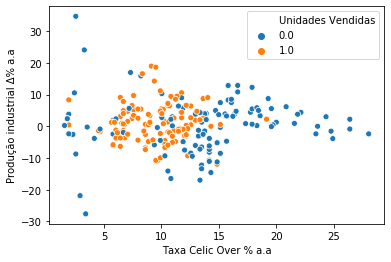

In [397]:
sns.scatterplot(data=dataset, x='Taxa Celic Over % a.a', y='Produção industrial Δ% a.a', hue='Unidades Vendidas')
plt.show()

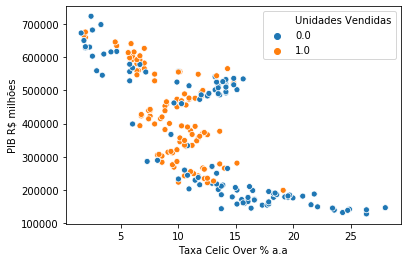

In [394]:
sns.scatterplot(data=dataset, x='Taxa Celic Over % a.a', y='PIB R$ milhões', hue='Unidades Vendidas')
plt.show()

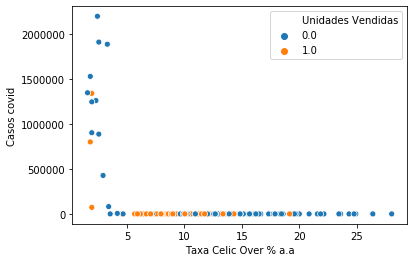

In [401]:
sns.scatterplot(data=dataset, x='Taxa Celic Over % a.a', y='Casos covid', hue='Unidades Vendidas')
plt.show()

## Aplicando KNN

In [402]:
X = np.array(dataset.drop(['Unidades Vendidas'],1))

y = np.array(dataset['Unidades Vendidas'])

In [403]:
## separando dados em treino e teste
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)

In [404]:
## normalizando dandos para entregar ao algoritmo KNN

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [405]:
modelo = neighbors.KNeighborsClassifier(n_neighbors=11, metric='euclidean')

In [406]:
modelo.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

## Acuracia

In [407]:
acuracia = modelo.score(X_test,y_test) 
acuracia

0.8222222222222222

## Criando uma fronteira entre os dados

In [412]:
def knn_comparison(dataset, k):
    x = dataset[['Taxa Celic Over % a.a','Produção industrial Δ% a.a']].values
    y = dataset['Unidades Vendidas'].astype(int).values
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(x, y)
    plot_decision_regions(x, y, clf=knn)
    plt.xlabel('Taxa Celic Over % a.a')
    plt.ylabel('Produção industrial Δ% a.a')
    plt.title('K='+ str(k))
    plt.show()

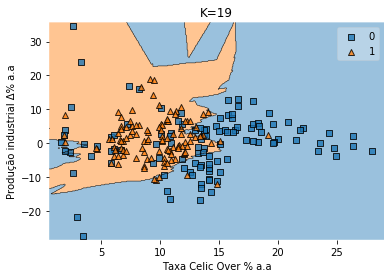

In [413]:
knn_comparison(dataset, k = 19)

## Prevendo a venda de veiculos

In [414]:
dataset.head(-1)

,IGPM Δ%,INPC Δ%,IPCA Δ%,Salário minimo R$,Taxa Celic Over % a.a,Balança comercial US$,PIB R$ milhões,Produção industrial Δ% a.a,Casos covid,Unidades Vendidas
0,2.33,2.47,2.25,200.0,26.38,1.040289e+09,127177.5,2.21,0,0.0
1,2.28,1.46,1.57,200.0,24.31,1.008624e+09,131373.6,3.01,0,0.0
2,1.53,1.37,1.23,200.0,23.58,1.422889e+09,138690.5,0.00,0,0.0
3,0.92,1.38,0.97,240.0,24.90,1.600226e+09,141388.1,-3.89,0,0.0
4,-0.26,0.99,0.61,240.0,26.38,2.416734e+09,139605.8,-0.87,0,0.0
...,...,...,...,...,...,...,...,...,...,...
215,0.96,1.46,1.35,1045.0,1.94,2.703120e+09,676356.7,8.32,1340095,1.0
216,2.58,0.27,0.25,1100.0,1.81,-2.046388e+08,650694.2,2.38,1528758,0.0
217,2.53,0.82,0.86,1100.0,1.57,1.822781e+09,673362.3,0.25,1346528,0.0
218,2.94,0.86,0.93,1100.0,2.43,6.410389e+09,723966.1,10.53,2197488,0.0


In [415]:
exemplo = np.array([2.1,0.85,0.83,1100,3.29,8583535555,500000,30,1500000])
exemplo = exemplo.reshape(1,-1)

exemplo = sc_X.transform(exemplo)
previsao = modelo.predict(exemplo)



In [416]:
print(previsao)

[0.]


In [417]:
## logo, modelo preveu que para esse valores
## as vendas vao estar abaixo da mediana.

In [418]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred=modelo.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[12  6]
 [ 2 25]]
0.8222222222222222


In [419]:
## a Confusion matriz mostra que:

##  12 era 0 e ele previu 0
## 6 era 0 e ele previu 1
## 25 era 1 e ele preveu 1
## 2 era 1 e ele preveu 0

Text(69.0, 0.5, 'Truth')

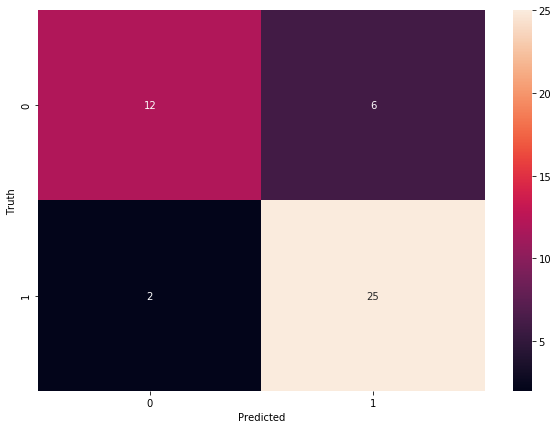

In [420]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Suport Vector Machine

In [421]:
import pandas as pd
import sklearn.model_selection as ms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

In [422]:
X = dataset.iloc[:,:-1].values
y = dataset['Unidades Vendidas'].values

In [423]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2, random_state=42)

In [424]:
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
X_train = sc_X_train.fit_transform(X_train)
X_test = sc_X_test.fit_transform(X_test)

In [425]:
classifier = SVC(kernel='poly', C = 40, degree = 3, gamma = 'scale')
classifier.fit(X_train, y_train)

SVC(C=40, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [426]:
y_pred = classifier.predict(X_test)

In [427]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[14  4]
 [ 3 24]]
0.8444444444444444


Text(69.0, 0.5, 'Truth')

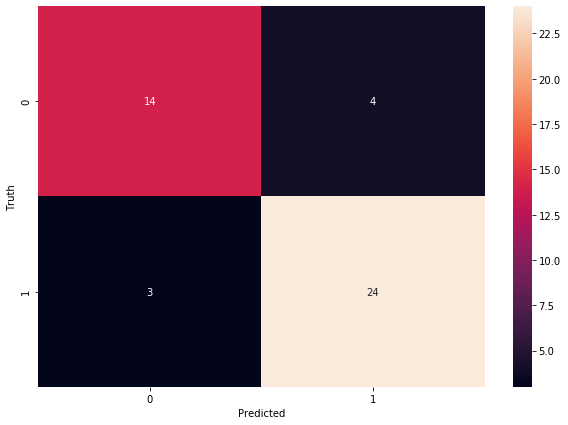

In [428]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [429]:
exemplo = np.array([4.10,0.85,0.83,1100,3.29,8583535555,68882,24,1552565])
exemplo = exemplo.reshape(1,-1)

exemplo = sc_X.transform(exemplo)
previsao = classifier.predict(exemplo)

previsao

array([0.])